In [55]:
import pandas as pd
#import numpy as pd
% matplotlib inline
import seaborn as sns
#import matplotlib.pyplot as plt

# Configuração gráfica.
sns.set(style="darkgrid");

labels = ['id', 'sobrevivente', 'classe', 'nome', 'sexo', 'idade', 'qtd_irmao_conjuge',
          'qtd_pai_filho', 'tarifa_passageiro', 'bilhete', 'cabine', 'porto_embarque'];
df = pd.read_csv('titanic-data-6.csv', header=0, index_col='id', names=labels);

In [58]:
# Verificando quantidade de registros, quantidade de colunas, colunas que possui valores nulos e tipo de dado de cada coluna.
df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
sobrevivente         891 non-null int64
classe               891 non-null int64
nome                 891 non-null object
sexo                 891 non-null object
idade                714 non-null float64
qtd_irmao_conjuge    891 non-null int64
qtd_pai_filho        891 non-null int64
tarifa_passageiro    891 non-null object
bilhete              891 non-null float64
cabine               204 non-null object
porto_embarque       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [59]:
# Verificando registros duplicados.
sum(df.duplicated())

0

In [60]:
# Verificando visualmente alguns registros.
df.head()

,sobrevivente,classe,nome,sexo,idade,qtd_irmao_conjuge,qtd_pai_filho,tarifa_passageiro,bilhete,cabine,porto_embarque
id,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
## Limpeza de dados ##

# Substituindo dados para uma melhor leitura. Origem das informações: https://www.kaggle.com/c/titanic/data
df['sobrevivente'] = df['sobrevivente'].replace([0, 1], ['não', 'sim']);
df['sexo'] = df['sexo'].replace(['male', 'female'], ['homem', 'mulher']);
df['porto_embarque'] = df['porto_embarque'].replace(['C', 'Q', 'S'], ['Cherbourg', 'Queenstown', 'Southampton']);

# Tratando os valores nulos não numéricos.
df["cabine"].fillna("não registrado", inplace = True);
df["porto_embarque"].fillna("não registrado", inplace = True);

# Preenchendo as idades nulas com a média da idade dos passageiros.
df['idade'] = df['idade'].fillna(df['idade'].mean());

In [62]:
df.head();

In [63]:
df.describe();

NameError: name 'cursor' is not defined

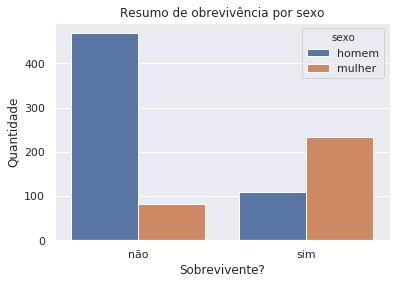

In [80]:
sns.countplot(data=df, x='sobrevivente', hue='sexo');
plt.title('Resumo de obrevivência por sexo');
plt.ylabel('Quantidade');
plt.xlabel('Sobrevivente?');

for row in cursor:
    # Print the name of the residential road
    print(row[1])

Avaliação: Percebe-se
Referência do Código: https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies

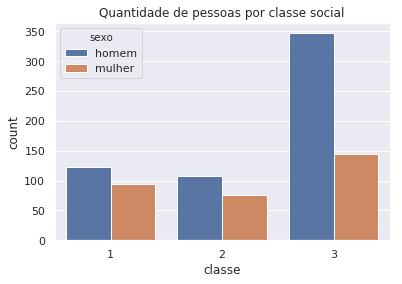

In [71]:
sns.countplot(x='classe', hue='sexo', data=df);
plt.title('Quantidade de pessoas por classe social');

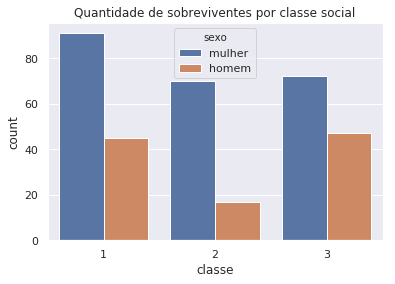

In [73]:
sns.countplot(x='classe', hue='sexo', data=df.query('sobrevivente == "sim"'));
plt.title('Quantidade de sobreviventes por classe social');

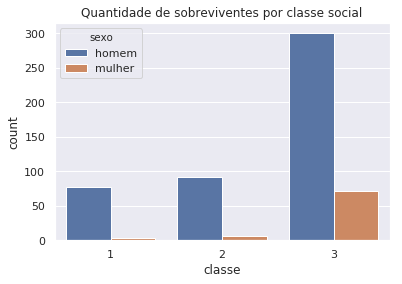

In [74]:
sns.countplot(x='classe', hue='sexo', data=df.query('sobrevivente == "não"'));
plt.title('Quantidade de sobreviventes por classe social');

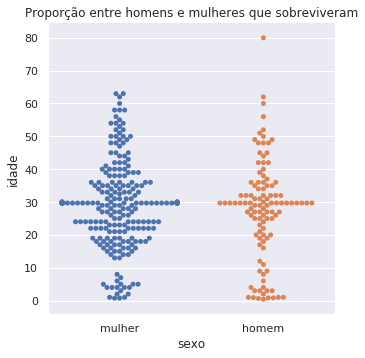

In [66]:
sns.catplot(x='sexo', y='idade', kind='swarm', data=df.query('sobrevivente == "sim"'));
plt.title('Proporção de homens e mulheres que sobreviveram');

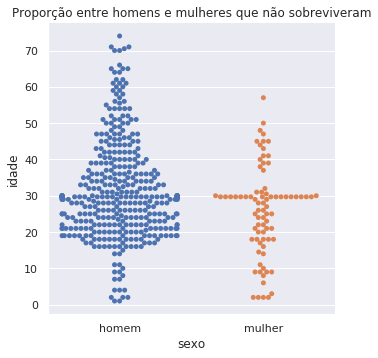

In [70]:
sns.catplot(x='sexo', y='idade', kind='swarm', data=df.query('sobrevivente == "não"'));
plt.title('Proporção de homens e mulheres que não sobreviveram');